***Local and Stochastic Volatility***

*Summary*:

We study volatility from both the physical and risk-neutral perspectives. Using historical returns, we estimate realized volatility under the physical measure. Using option prices, we extract the implied volatility surface under the risk-neutral measure. We parametrize this surface using SVI/SSVI and derive the corresponding local volatility dynamics. Finally, we calibrate a stochastic volatility model (Heston) and compare the implied and realized variance to estimate the volatility risk premium.

*Deliverables*:

Pull daily price data and options chains for a liquid underlying (SPY, AAPL, TSLA, etc.)

Compute realized volatility (close-to-close, Parkinson, Garman–Klass)

Compute Black–Scholes Implied Volatility and plot smile/skew

Calculate local volatility (Dupire) from a fit of IV - SVI and SSVI

Calibrate a Heston model

Compute volatility risk premium

**Data acquisition**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [3]:
# stock data
ticker_symbol = "SPY"
ticker = yf.Ticker(ticker_symbol)
historical_data = ticker.history(start="2022-01-01", end="2026-01-02", interval="1d")
exps = ticker.options

In [4]:
# show stock data
historical_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2022-01-03 00:00:00-05:00,450.541372,452.007565,448.223887,451.875122,72668200,0.0,0.0,0.0
2022-01-04 00:00:00-05:00,453.303545,454.022453,449.860384,451.723846,71178700,0.0,0.0,0.0
2022-01-05 00:00:00-05:00,451.354853,452.130514,442.955085,443.049683,104538900,0.0,0.0,0.0
2022-01-06 00:00:00-05:00,442.586260,445.357798,440.259278,442.633545,86858900,0.0,0.0,0.0
2022-01-07 00:00:00-05:00,442.643062,443.825461,439.521510,440.883636,85111600,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-12-24 00:00:00-05:00,687.950012,690.830017,687.799988,690.380005,39445600,0.0,0.0,0.0
2025-12-26 00:00:00-05:00,690.640015,691.659973,689.270020,690.309998,41613300,0.0,0.0,0.0
2025-12-29 00:00:00-05:00,687.539978,689.200012,686.070007,687.849976,62559500,0.0,0.0,0.0


In [5]:
# show options data
ticker.option_chain(exps[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY260105C00550000,2025-12-24 16:49:02+00:00,550.0,141.23,132.08,134.85,0.000000,0.000000,NaN,1,1.086919,True,REGULAR,USD
1,SPY260105C00610000,2025-12-23 15:57:28+00:00,610.0,77.41,72.09,74.86,0.000000,0.000000,NaN,1,0.623051,True,REGULAR,USD
2,SPY260105C00615000,2026-01-02 17:20:27+00:00,615.0,67.32,67.09,69.87,-9.300003,-12.137827,50.0,49,0.585942,True,REGULAR,USD
3,SPY260105C00630000,2026-01-02 17:19:42+00:00,630.0,52.42,52.09,54.88,-8.970001,-14.611503,190.0,20,0.672367,True,REGULAR,USD
4,SPY260105C00640000,2026-01-02 16:34:08+00:00,640.0,42.49,42.09,44.89,-0.509998,-1.186043,231.0,45,0.573491,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SPY260105C00755000,2025-12-29 15:05:09+00:00,755.0,0.01,0.00,0.01,0.000000,0.000000,3.0,370,0.367194,False,REGULAR,USD
68,SPY260105C00775000,2025-12-26 21:07:01+00:00,775.0,0.01,0.00,0.01,0.000000,0.000000,25.0,26,0.460943,False,REGULAR,USD
69,SPY260105C00785000,2025-12-23 20:54:10+00:00,785.0,0.01,0.00,0.01,0.000000,0.000000,NaN,49,0.500005,False,REGULAR,USD
70,SPY260105C00790000,2025-12-29 17:32:39+00:00,790.0,0.02,0.00,0.01,0.000000,0.000000,1.0,19,0.523442,False,REGULAR,USD


**Historical volatility calculation**

In [6]:
# hist vol for different estimators
def get_historical_vol(historical_data):
    # get log returns
    historical_data['logReturn'] = np.log(historical_data['Close'] / historical_data['Close'].shift(1))
    N = historical_data.shape[0]
    
    # close-to-close
    close_to_close_vol = (np.sqrt(historical_data['logReturn'].var(ddof=0)))*np.sqrt(252)
    print(f"Close-to-close volatility (annualized): {close_to_close_vol*100}%")
    
    # Parkinson
    historical_data['parkinsonReturn'] = np.log(historical_data['High'] / historical_data['Low'])
    parkinson_vol = (np.sqrt((historical_data['parkinsonReturn']**2).sum()/(4*np.log(2)*N)))*np.sqrt(252)
    print(f"Parkinson volatility (annualized): {parkinson_vol*100}%")
    
    # Garman-Klass
    logHL = np.log(historical_data['High'] / historical_data['Low'])
    logCO = np.log(historical_data['Close'] / historical_data['Open'])
    garman_klass_vol = (np.sqrt((0.5 * np.mean(logHL**2)- (2*np.log(2) - 1) * np.mean(logCO**2))))*np.sqrt(252)
    print(f"Garman-Klass volatility (annualized): {garman_klass_vol*100}%")

get_historical_vol(historical_data)

Close-to-close volatility (annualized): 17.970498817380154%
Parkinson volatility (annualized): 14.290132454582642%
Garman-Klass volatility (annualized): 13.952054305388566%


**Filter data**

In [8]:
S0 = historical_data['Close'].iloc[-1] # current asset price

# get df of cleaned calls
def get_calls(ticker, min_tau, max_tau, min_money, max_money):
    # pull the calls at different expiries
    options = pd.DataFrame()
    for e in exps:
        opt = ticker.option_chain(e).calls
        opt['expirationDate'] = e
        options = pd.concat([options,opt], ignore_index = True)
        
    # keep important columns
    calls = options[['contractSymbol', 'strike', 'bid', 'ask', 'lastPrice','expirationDate', 'volume', 'openInterest']].copy()
    # filter on volume and interest
    calls = calls[(calls['volume'] > 1) & (calls['openInterest'] > 20)]
    # add in time to expiry
    td = pd.Timestamp.today() 
    calls['daysToExpiry'] = (pd.to_datetime(calls['expirationDate']) - td).dt.days
    # add market price
    calls = calls[(calls['bid'] > 0.5) & (calls['ask'] > calls['bid'])]
    calls['marketPrice'] = 0.5 * (calls['bid'] + calls['ask'])
    # drop columns
    calls = calls[['contractSymbol', 'strike', 'marketPrice', 'lastPrice', 'daysToExpiry']]
    # filter the calls on time to expiry
    calls = calls[(calls['daysToExpiry']>min_tau) & (calls['daysToExpiry']<max_tau)]
    # filter on at-the-money
    calls = calls[(np.log(calls['strike']/S0) > min_money) & (np.log(calls['strike']/S0) < max_money)]
    
    return calls

In [9]:
#show calls 
calls = get_calls(ticker,50, 365, np.log(.7), np.log(1.3))
calls

,contractSymbol,strike,marketPrice,lastPrice,daysToExpiry
1051,SPY260227C00500000,500.0,186.865,188.54,54
1053,SPY260227C00510000,510.0,177.060,179.00,54
1057,SPY260227C00530000,530.0,157.295,160.91,54
1061,SPY260227C00550000,550.0,137.460,136.36,54
1063,SPY260227C00560000,560.0,127.750,124.66,54
...,...,...,...,...,...
2505,SPY261218C00850000,850.0,2.535,2.53,348
2507,SPY261218C00860000,860.0,2.035,2.00,348
2510,SPY261218C00875000,875.0,1.475,1.51,348
2511,SPY261218C00880000,880.0,1.325,1.24,348


**Calculate Black-Scholes Implied Volatility**

In [10]:
from scipy.stats import norm
from scipy.optimize import brentq

# BSM pricing
def BSM_call(S_t, K, tau, sigma, r):
    d_1 = (np.log(S_t/K) + (r+(sigma**2)/2)*tau)/(sigma*np.sqrt(tau))
    d_2 = d_1 - sigma*np.sqrt(tau)
    price = S_t*norm.cdf(d_1) - K*np.exp(-r*tau)*norm.cdf(d_2)
    return price

# implied volatility calc
def implied_vol_call(C_mkt, S_t, K, tau, r):
    def f(sigma):
        return BSM_call(S_t, K, tau, sigma, r) - C_mkt
    return brentq(f, -1.0, 5.0) # root finder

# calc IV and filter
risk_free = 0.04
calls['impliedVol'] = calls.apply(lambda row: implied_vol_call(row['marketPrice'],S0, row['strike'], row['daysToExpiry']/365.0 ,risk_free),axis=1)
calls = calls[(calls['impliedVol'] > 0.01)]

Text(0.5, 1.0, 'SPY calls')

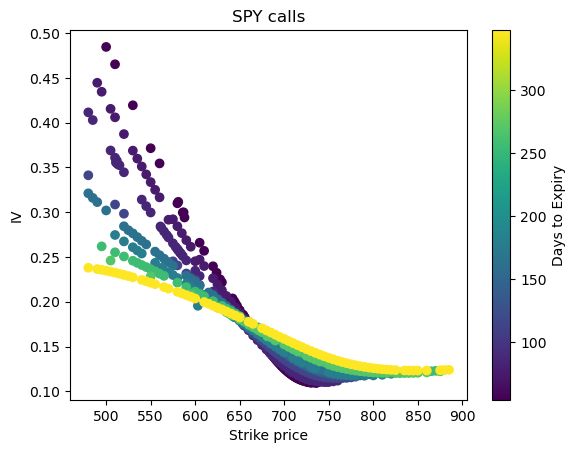

In [11]:
# plot BS IV
plt.scatter(calls['strike'], calls['impliedVol'],c=calls['daysToExpiry'], cmap='viridis')
plt.colorbar(label='Days to Expiry')
plt.xlabel("Strike price")
plt.ylabel("IV")
plt.title(f"{ticker_symbol} calls")

In [12]:
#plot in 3-d
import plotly.graph_objects as go

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=np.log(calls['strike']/S0),
            y=calls['daysToExpiry']/365.0,
            z=calls['impliedVol'],
            mode='markers',
            marker=dict(
                size=4,
                color=calls['impliedVol'],
                colorscale='Viridis',
                opacity=0.8,
                colorbar=dict(
                    title=dict(
                        text='Implied<br>Volatility',
                        font=dict(size=14)
                    ),
                    thickness=20,
                    len=0.7,
                    tickfont=dict(size=12)
                )
            ),
            name='Calls'
        )
    ]
)

fig.update_layout(
    title=dict(
        text=f'{ticker_symbol} Implied Volatility Surface (Calls)',
        font=dict(size=20, family='Arial Black'),
        x=0.5,
        xanchor='center'
    ),
    scene=dict(
        xaxis=dict(
            title=dict(text='Moneyness', font=dict(size=14)),
            tickfont=dict(size=11),
            gridcolor='lightgray',
            showbackground=True,
            backgroundcolor='rgb(240, 240, 240)'
        ),
        yaxis=dict(
            title=dict(text='Time to Maturity (years)', font=dict(size=14)),
            tickfont=dict(size=11),
            gridcolor='lightgray',
            showbackground=True,
            backgroundcolor='rgb(240, 240, 240)'
        ),
        zaxis=dict(
            title=dict(text='Implied Volatility', font=dict(size=14)),
            tickfont=dict(size=11),
            gridcolor='lightgray',
            showbackground=True,
            backgroundcolor='rgb(240, 240, 240)'
        ),
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.3)
        )
    ),
    width=1000,
    height=700,
    margin=dict(l=0, r=0, t=50, b=0),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

**Fit Raw SVI model**

In [13]:
# get SVI-able data
calls["totalImpliedVariance"] = (calls['impliedVol']**2)*(calls['daysToExpiry']/365.0)
calls['k'] = np.log(calls['strike']/(S0*np.exp(risk_free*calls['daysToExpiry']/365.0)))
calls['yearsToExpiry'] = calls['daysToExpiry']/365.0

In [14]:
from scipy.optimize import least_squares

# raw SVI model
def get_svi_w(k, params):
    a, b, sigma, rho, m = params
    return a + b * (rho * (k - m) + np.sqrt((k - m)**2 + sigma**2))
    
# since fitting each time, split up data by time to expiry
expiry_times = np.array(calls['yearsToExpiry'].unique())
time_data_dict = {}
for time in expiry_times:
    df = calls[calls['yearsToExpiry'] == time].copy()
    df = df[["totalImpliedVariance", 'k']]
    time_data_dict[time] = df
    
# tau of call with SVT fit params
svi_dict = {}
for tau in time_data_dict.keys():
    k_arr = np.array(time_data_dict[tau]['k'])
    w_arr = np.array(time_data_dict[tau]['totalImpliedVariance'])

    lower_bounds = [-np.inf, -np.inf, 0, -np.inf, -np.inf]
    upper_bounds = [np.inf, np.inf, np.inf,np.inf, np.inf]
    bounds = (lower_bounds,upper_bounds)
    
    a0 = np.mean(w_arr)
    b0 = 0.1  # initial slope
    sigma0 = 0.1  # initial curvature
    rho0 = 0.0  # no skew initially
    m0 = k_arr[np.argmin(w_arr)]  # k at minimum w

    p0 = [a0, b0, sigma0, rho0, m0]
    
    # Objective function: difference between model and observed
    def objective(p):
        return (get_svi_w(k_arr, p) - w_arr)**2

    res = least_squares(objective, x0=p0, bounds = bounds)
    svi_dict[tau]= res.x
    print(res.x)

[-7.09062061e-04  7.12654082e-02  1.27932542e-01 -1.04368239e+00
 -9.96720363e-02]
[-0.00756665  0.09693933  0.18624558 -0.84855857 -0.11047639]
[ 8.78256772e-04  7.01817818e-02  1.44444614e-01 -1.08135550e+00
 -1.19201490e-01]
[ 0.00155222  0.04913294  0.10253211 -0.84433854  0.00499423]
[ 3.79959319e-04  6.25353656e-02  9.99557491e-02 -4.92432203e-01
  5.27338479e-02]
[ 0.00239206  0.06109069  0.10730676 -0.77122097  0.02083441]
[-0.0008046   0.06576046  0.13497945 -0.46739611  0.05392841]
[ 0.00525239  0.06384058  0.0960714  -0.53341449  0.09225747]
[ 0.00573158  0.06130006  0.09759039 -0.47580392  0.10188425]
[ 0.00953597  0.0735403   0.05640687 -0.16882858  0.15895141]


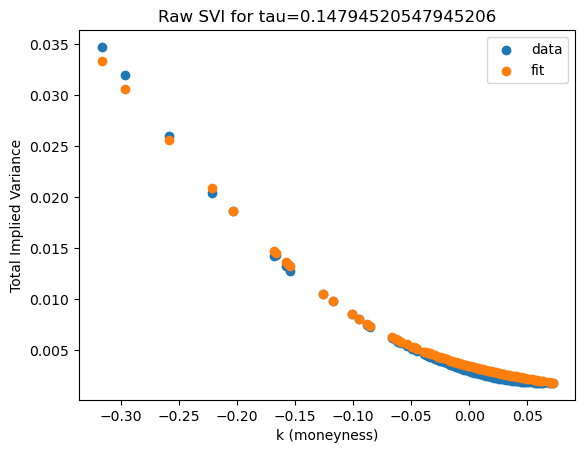

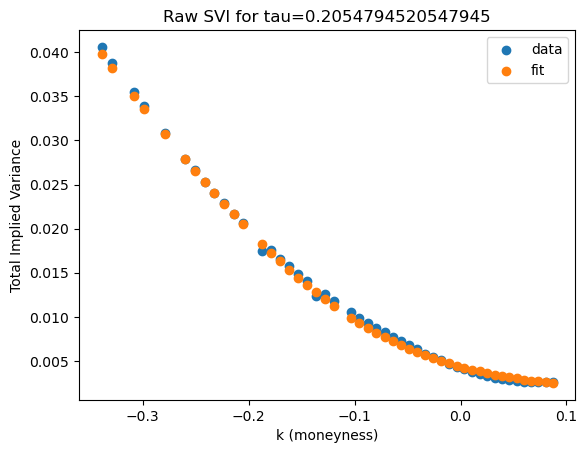

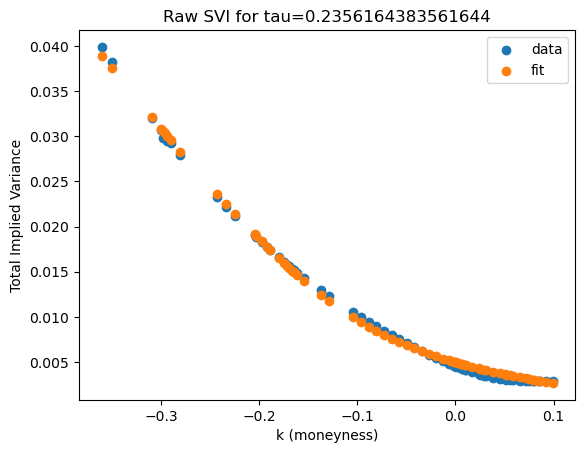

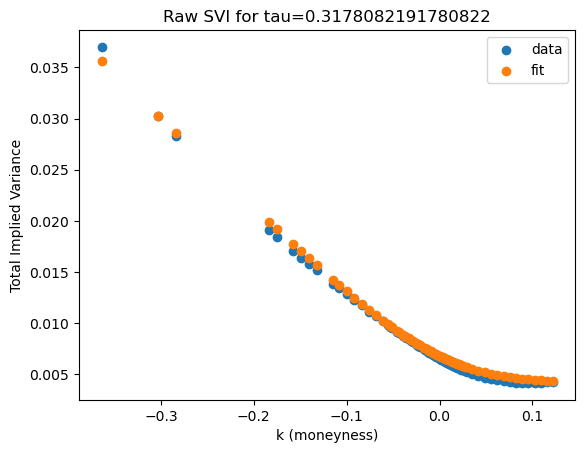

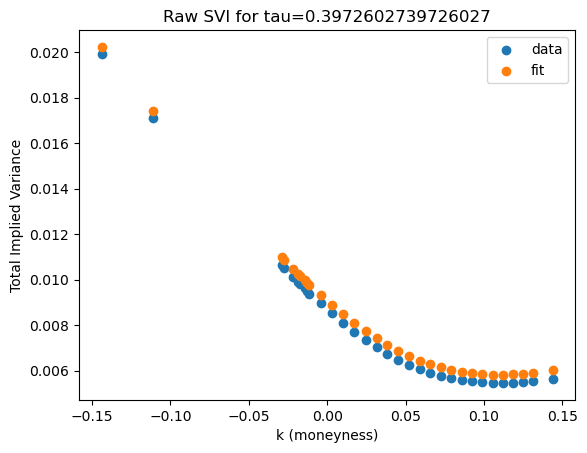

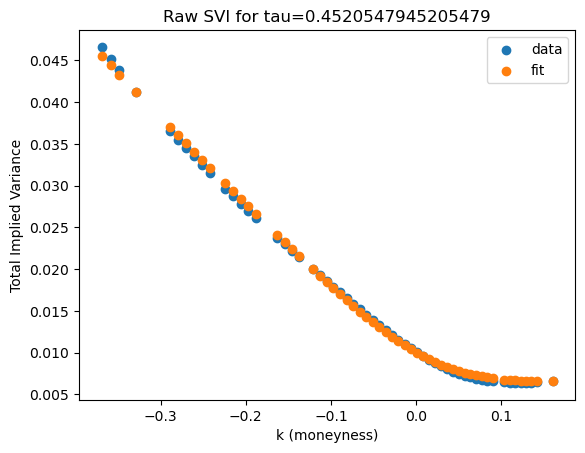

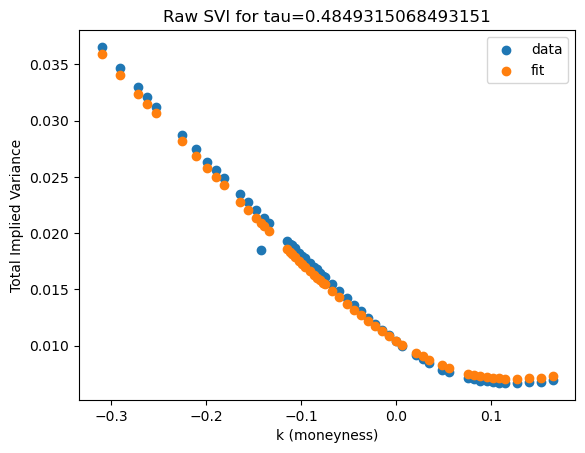

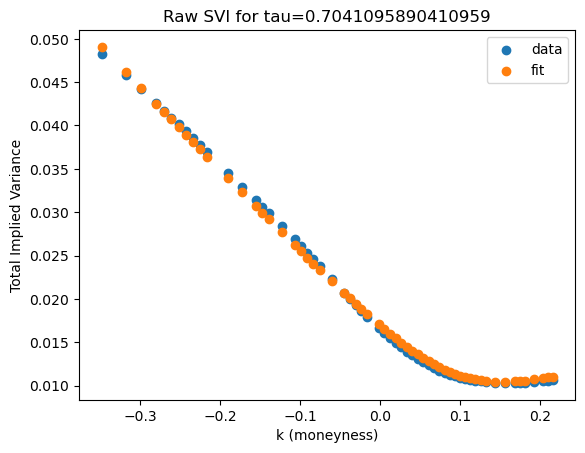

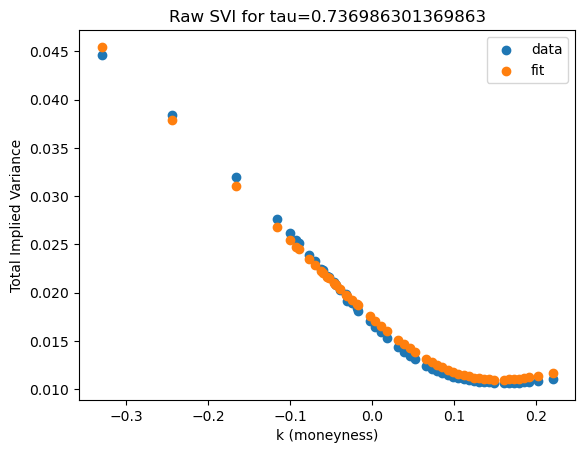

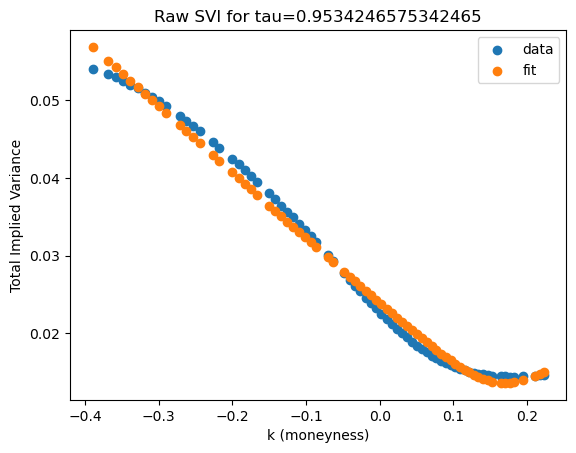

In [15]:
# check fits
for tau in time_data_dict.keys():
    k_arr = time_data_dict[tau]['k']
    w_arr = time_data_dict[tau]['totalImpliedVariance']
    params = svi_dict[tau]
    plt.scatter(k_arr, w_arr, label = "data")
    plt.scatter(k_arr, get_svi_w(k_arr, params), label="fit")
    plt.xlabel("k (moneyness)")
    plt.ylabel("Total Implied Variance")
    plt.legend()
    plt.title(f"Raw SVI for tau={tau}")
    plt.show()

In [16]:
# grid for SVI IV
num_k_points = 100
taus = sorted(svi_dict.keys())
k_min = min(df['k'].min() for df in time_data_dict.values())
k_max = max(df['k'].max() for df in time_data_dict.values())
k_grid = np.linspace(k_min, k_max, num_k_points)
K, T = np.meshgrid(k_grid, taus)
IV_surface = np.zeros_like(K)
for i, tau in enumerate(taus):
    w_grid = get_svi_w(k_grid, svi_dict[tau])
    IV_surface[i, :] = np.sqrt(w_grid/tau)

# plot surface
fig = go.Figure(
    data=[
        go.Surface(
            x=K,
            y=T,
            z=IV_surface,
            colorscale='Viridis',
            colorbar=dict(title='SVI IV')
        )
    ]
)
fig.update_layout(
    title=dict(
        text=f'{ticker_symbol} Calls SVI Surface ',
        font=dict(size=20, family='Arial Black'),
        x=0.5,
        xanchor='center'
    ),
    scene=dict(
        xaxis_title='Log-moneyness k',
        yaxis_title='Time to expiry (years)',
        zaxis_title='SVI Implied Volatility'
    ),
    width=1000,
    height=700,
    margin=dict(l=0, r=0, t=50, b=0),
    paper_bgcolor='white',
    plot_bgcolor='white'
)

fig.show()

**Local Volatility Model with Raw SVI**

Use Dupire's here - in terms of total implied variance w, time to expiry T, and moneyness k, this is:

sigma_loc^2 = (dw/dT)/{1-(k/w)(dw/dk) + .25(-.25-(1/w)+(k/w)^2)(dw/dk)^2 + .5(d^2w/dk^2)}

In [17]:
# get the k derivatives, t derivatives will be finitely differences
def get_svi_derivatives(k, params):
    # analytic derivatives of w = a + b * (rho * (k - m) - sqrt((k - m)**2 + sigma**2))
    a, b, sigma, rho, m = params
    x = k - m
    sqrt_term = np.sqrt(x**2 + sigma**2)
    
    # dw/dk
    dw_dk = b * (rho - x / sqrt_term)
    
    # d2w/dk2
    d2w_dk2 = -b * (sigma**2 / (sqrt_term**3))
    
    return dw_dk, d2w_dk2

# get Dupire local vol
def compute_local_vol_svi(k, t, svi_dict, eps=1e-8):
    sorted_taus = sorted(svi_dict.keys())
    
    # find time neighbors for finite difference
    idx = np.searchsorted(sorted_taus, t)
    if idx == 0:
        t1, t2 = sorted_taus[0], sorted_taus[1]
    elif idx == len(sorted_taus):
        t1, t2 = sorted_taus[-2], sorted_taus[-1]
    else:
        t1, t2 = sorted_taus[idx-1], sorted_taus[idx]

    # get variance at both times to calculate dw/dt
    w1 = get_svi_w(k, svi_dict[t1])
    w2 = get_svi_w(k, svi_dict[t2])
    
    dw_dt = (w2 - w1) / (t2 - t1)
    
    # calendar arbitrage condition: variance must increase with time
    if dw_dt < 0:
        dw_dt = 0
        
    # get spatial derivatives at target time t (use nearest fit)
    current_params = svi_dict[min(sorted_taus, key=lambda x: abs(x-t))]
    w = get_svi_w(k, current_params)
    dw_dk, d2w_dk2 = get_svi_derivatives(k, current_params)
    
    # Dupire denominator
    # where spikes happen if it approaches zero
    denom = (1 - (k/w)*dw_dk + 0.25*(-0.25 - 1/w + (k**2)/(w**2))*(dw_dk**2) + 0.5*d2w_dk2)
    
    # if denom <= 0, it's a butterfly violation - floor it to avoid spike
    if denom < 0.01: 
        denom = .01
    
    local_var = dw_dt / denom
    
    # clamp results to avoid unrealistic spikes
    return np.sqrt(max(0, local_var))

In [18]:
import plotly.graph_objects as go

# grid
sorted_taus = sorted(svi_dict.keys())
k_range = np.linspace(-0.5, 0.5, 50)
t_range = np.linspace(min(sorted_taus), max(sorted_taus), 50)
K_mesh, T_mesh = np.meshgrid(k_range, t_range)
LV_surface = np.zeros_like(K_mesh)

# compute surface
for i in range(len(t_range)):
    for j in range(len(k_range)):
        LV_surface[i, j] = compute_local_vol_svi(k_range[j], t_range[i], svi_dict)

# plot
fig_lv = go.Figure(data=[go.Surface(
    x=K_mesh, 
    y=T_mesh, 
    z=LV_surface,
    colorscale='Jet',
    colorbar=dict(title='Local Vol')
)])
fig_lv.update_layout(
    title=f'{ticker_symbol} Calls SVI Local Volatility Surface',
    scene=dict(
        xaxis_title='Log-Moneyness (k)',
        yaxis_title='Time to Expiry (T)',
        zaxis_title='Local Volatility'
    ),
    width=900,
    height=700
)

fig_lv.show()

Something is clearly going wrong. What appears to be going on is that raw SVI is not arbitrage-free. The volatility blows up when the denominator goes to zero - the density at each slice must be non-negative to avoid butterfly arbitrage. Additionally, dw/dt should be non-negative to avoid calendar arbitrage.

Hence, let's propose a smoother model with a better chance of stopping these arbitrage blowups.

**Fitting Surface SVI (SSVI)**

For w the total implied variation, k the strike price, rho correlation, theta_t the ATM total variance per maturity, and phi a function controlling the smile, define:

w(k, theta_t) = (theta_t/2)[1 + (rho phi(theta_t) k) + sqrt((phi(theta_t) k + rho)^2 + (1-rho^2))]

In [19]:
# get thetas
thetas = {}
for tau, df in time_data_dict.items():
    # Find the variance where k is closest to 0
    atm_idx = np.argmin(np.abs(df['k']))
    thetas[tau] = df['totalImpliedVariance'].iloc[atm_idx]
sorted_taus = sorted(thetas.keys())

In [20]:
# SSVI w
def ssvi_formula(k, theta, rho, phi):
    return (theta / 2.0) * (1.0 + rho * phi * k + np.sqrt((phi * k + rho)**2 + (1.0 - rho**2)))
# phi function, Heston-like
def phi_heston(theta, eta, gamma=0.5):
    return eta / (theta**gamma)
# objective function
def ssvi_surface_objective(params, time_data_dict, thetas):
    rho, eta, gamma = params
    errors = []
    for tau, df in time_data_dict.items():
        theta = thetas[tau]
        phi = phi_heston(theta, eta, gamma)
        
        k_vals = df['k'].values
        w_market = df['totalImpliedVariance'].values
        w_model = ssvi_formula(k_vals, theta, rho, phi)
        
        errors.extend(w_model - w_market)
        
    return np.array(errors)

# fit model params
p0 = [-0.5, 0.5, 0.5]
bounds = ([-0.99, 1e-4, 0.0], [0.99, 10.0, 1.0])
res = least_squares(ssvi_surface_objective, x0=p0, bounds=bounds, args=(time_data_dict, thetas))
rho_fit, eta_fit, gamma_fit = res.x
print(f"Fitted SSVI Params: rho={rho_fit:.4f}, eta={eta_fit:.4f}, gamma={gamma_fit:.4f}")

Fitted SSVI Params: rho=-0.6132, eta=0.1863, gamma=0.8967


**Dupire's with SSVI**

In [21]:
# derivatives - can do all analytical this time
def get_ssvi_derivatives(k, theta, rho, eta, gamma):
    phi = phi_heston(theta, eta, gamma)
    arg = phi * k + rho
    sqrt_term = np.sqrt(arg**2 + (1 - rho**2))
    
    # dw/dk
    dw_dk = (theta / 2.0) * (rho * phi + (phi * arg) / sqrt_term)
    
    # d2w/dk2
    d2w_dk2 = (theta / 2.0) * (phi**2 * (1 - rho**2) / (sqrt_term**3))
    
    # dw/dtheta (required for time derivative)
    dphi_dtheta = -gamma * eta * (theta**(-gamma - 1))
    
    # Derivative of w with respect to theta
    term1 = (1/theta) * ssvi_formula(k, theta, rho, phi)
    term2 = (theta / 2.0) * (rho * k * dphi_dtheta + (arg * k * dphi_dtheta) / sqrt_term)
    dw_dtheta = term1 + term2
    
    return dw_dk, d2w_dk2, dw_dtheta

# SSVI local vol
def compute_local_vol_ssvi(k, t, thetas, sorted_taus, rho, eta, gamma):
    # need theta at all times - use linear interpolation
    theta_interp = np.interp(t, sorted_taus, [thetas[tau] for tau in sorted_taus])
    # Finite difference for dtheta/dt (slope of ATM variance)
    dt = 1e-4
    t_high = min(t + dt, sorted_taus[-1])
    t_low = max(t - dt, sorted_taus[0])
    theta_high = np.interp(t_high, sorted_taus, [thetas[tau] for tau in sorted_taus])
    theta_low = np.interp(t_low, sorted_taus, [thetas[tau] for tau in sorted_taus])
    dtheta_dt = (theta_high - theta_low) / (t_high - t_low)
    
    # derivatives
    dw_dk, d2w_dk2, dw_dtheta = get_ssvi_derivatives(k, theta_interp, rho, eta, gamma)
    
    # chain rule for dw/dt
    dw_dt = dw_dtheta * dtheta_dt
    
    # Dupire
    w = ssvi_formula(k, theta_interp, rho, phi_heston(theta_interp, eta, gamma))
    denom = (1 - (k/w)*dw_dk + 0.25*(-0.25 - 1/w + (k**2)/(w**2))*(dw_dk**2) + 0.5*d2w_dk2)
    
    # floor denominator to prevent spikes
    denom = max(denom, 1e-4)
    
    return np.sqrt(max(0, dw_dt / denom))

In [22]:
# grid 
k_range = np.linspace(-0.5, 0.5, 100) 
t_range = np.linspace(min(sorted_taus), max(sorted_taus), 50) 
K_mesh, T_mesh = np.meshgrid(k_range, t_range)
IV_ssvi_surface = np.zeros_like(K_mesh)
for i, t in enumerate(t_range):
    # interpolate theta for the current time slice
    theta_t = np.interp(t, sorted_taus, [thetas[tau] for tau in sorted_taus])
    
    # calc phi for this slice using fitted eta and gamma
    phi_t = eta_fit / (theta_t**gamma_fit)
    
    # calc w for row of k values
    arg = phi_t * k_range + rho_fit
    w_row = (theta_t / 2.0) * (1.0 + rho_fit * phi_t * k_range + 
                               np.sqrt(arg**2 + (1.0 - rho_fit**2)))
    
    # convert to IV
    IV_ssvi_surface[i, :] = np.sqrt(w_row / t)

# plot
fig_ssvi = go.Figure(data=[go.Surface(
    x=K_mesh, 
    y=T_mesh, 
    z=IV_ssvi_surface,
    colorscale='Viridis',
    contours={
        "z": {"show": True, "start": 0.1, "end": 0.8, "size": 0.05, "color":"white"}
    },
    colorbar=dict(title='SSVI IV')
)])
fig_ssvi.update_layout(
    title=dict(
        text=f'{ticker_symbol} SSVI Implied Volatility Surface',
        x=0.5,
        font=dict(size=22, family='Arial Black')
    ),
    scene=dict(
        xaxis_title='Log-Moneyness (k)',
        yaxis_title='Time to Expiry (T)',
        zaxis_title='Implied Volatility',
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.2))
    ),
    width=1000,
    height=800,
    margin=dict(l=0, r=0, b=0, t=60)
)

fig_ssvi.show()

This is a snapshot of where the market is currently. It might not be this way if the spot price changes. For a more dynamical model, let's implement a Heston model.

**Heston model**

In Heston, the volatility of a stock is not constant, but rather follows:

dV (t) = κ(θ − V (t)) dt + σ sqrt(V (t)) dW_2(t).

Recall that Heston can be priced using characteristic functions. Specifically, I give the FFT approach and Alan Lewis' approach (detailed in https://papers.ssrn.com/sol3/papers.cfm?abstract_id=282110 and https://pfadintegral.com/docs/Schmelzle2010%20Fourier%20Pricing.pdf). This is supposedly better for calibration than FFT/Carr-Madan, but FFT is faster.

In [23]:
from scipy.integrate import quad
from numpy.fft import fft
# Heston characteristic function
def heston_char_func(u, T, r, kappa, theta, sigma, rho, v0):
    xi = kappa - 1j * rho * sigma * u
    d = np.sqrt(xi**2 + sigma**2 * (u**2 + 1j * u))
    g = (xi - d) / (xi + d)
    # Riccati solns
    C = (kappa * theta / sigma**2) * ((xi - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
    D = ((xi - d) / sigma**2) * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
    
    return np.exp(C + D * v0 + 1j * u * np.log(S0 * np.exp(r * T)))

# Lewis pricing
def heston_lewis_price(S0, K, T, r, kappa, theta, sigma, rho, v0):
    # the integrand
    def integral_func(u):
        cf = heston_char_func(u - 0.5j, T, r, kappa, theta, sigma, rho, v0)
        return (np.exp(-1j * u * np.log(K)) * cf / (u**2 + 0.25)).real
    # use quad
    integral, _ = quad(integral_func, 0, 100)
    return S0 - np.sqrt(S0 * K) * np.exp(-r * T) / np.pi * integral

# Carr-Madan pricing
def heston_fft_price(S0, K_min, T, r, params, N=4096, upper_u=100, alpha=1.5):
    kappa, theta, sigma, rho, v0 = params
    #grid
    delta_u = upper_u / N
    u_j = np.arange(N) * delta_u
    # spacing in log-strike space (FFT requirement)
    delta_k = (2 * np.pi) / (N * delta_u)
    # lower bound of the log-strike grid
    b = np.log(S0) - (N * delta_k) / 2
    k_grid = b + np.arange(N) * delta_k
    
    def phi_damped(u):
        # Carr-Madan requires u - (alpha + 1)i
        v = u - (alpha + 1) * 1j
        cf = heston_char_func(v, T, r, kappa, theta, sigma, rho, v0)
        # Carr-Madan denominator
        denom = alpha**2 + alpha - u**2 + 1j * (2 * alpha + 1) * u
        return (np.exp(-1j * u * b) * cf) / denom

    # Simpson's Rule weights for better accuracy
    weights = (delta_u / 3) * (3 + (-1)**np.arange(1, N + 1))
    weights[0] = delta_u / 3
    
    # compute FFT
    fft_input = phi_damped(u_j) * weights
    fft_output = fft(fft_input)
    call_prices = (np.exp(-alpha * k_grid) / np.pi) * fft_output.real
    strikes = np.exp(k_grid)
    
    # Filter for the strikes you actually want
    mask = (strikes > K_min) & (strikes < S0 * 2)
    return strikes[mask], call_prices[mask]

In [24]:
from scipy.optimize import differential_evolution, OptimizeResult
from scipy.interpolate import interp1d

# Heston objective - Carr-Madan
def heston_fft_objective(params, market_df, S0, risk_free):
    # params: [kappa, theta, sigma, rho, v0]
    total_sse = 0
    # group by maturity, one FFT call handles ALL strikes for that T
    grouped = market_df.groupby('yearsToExpiry')
    for T, data in grouped:
        # do FFT for this maturity
        fft_strikes, fft_prices = heston_fft_price(S0, data['strike'].min()*0.8, 
                                                    T, risk_free, params)
        # create interpolator for the model prices to "lookup" price for any market strike
        model_price_func = interp1d(fft_strikes, fft_prices, kind='cubic', 
                                    fill_value="extrapolate")
        # get model prices at the market strikes
        market_strikes = data['strike'].values
        model_prices = model_price_func(market_strikes)
        actual_prices = data['marketPrice'].values
        
        # relative error often more stable for calibration
        errors = (model_prices - actual_prices) / actual_prices
        total_sse += np.sum(errors**2)
    return total_sse

# Heston objective (Lewis)
def heston_lewis_objective(params, market_data):
    kappa, theta, sigma, rho, v0 = params
    # will ignore Feller for now, unlikely to hit 0
    total_error = 0
    for _, row in market_data.iterrows():
        model_p = heston_lewis_price(S0, row['strike'], row['yearsToExpiry'], 
                               risk_free, kappa, theta, sigma, rho, v0)
        total_error += (model_p - row['marketPrice'])**2
    return total_error

# callback to see progress
def callback_show(intermediate_result: OptimizeResult):
    current_x = intermediate_result.x
    current_fun = intermediate_result.fun
    print(f"Current best x: {current_x}, function value: {current_fun}")

bounds = [(0.1, 5.0), (0.01, 0.4), (0.01, 1.0), (-0.95, 0.0), (0.01, 0.4)]

# Carr-Madan training
result = differential_evolution(
    heston_fft_objective, 
    bounds=bounds, 
    args=(calls, S0, risk_free),
    strategy='best1bin',
    maxiter=100,
    popsize=15,
    workers=1,
    callback = callback_show 
)
'''
# Lewis training
# global search (prevents getting stuck in local minima)
result = differential_evolution(heston_lewis_objective, bounds, args=(calls,), callback=callback_show)
'''
print(f"Optimal Parameters: {result.x}")

Current best x: [ 1.00744854  0.04735322  0.49052825 -0.42412079  0.01310112], function value: 26.56624165953458
Current best x: [ 0.59410965  0.01814531  0.23222011 -0.48006993  0.01823227], function value: 11.340857204210701
Current best x: [ 0.59410965  0.01814531  0.23222011 -0.48006993  0.01823227], function value: 11.340857204210701
Current best x: [ 0.59410965  0.01814531  0.23222011 -0.48006993  0.01823227], function value: 11.340857204210701
Current best x: [ 0.59410965  0.01814531  0.23222011 -0.48006993  0.01823227], function value: 11.340857204210701
Current best x: [ 2.41099325  0.02094854  0.25113694 -0.39507185  0.01572472], function value: 6.118199408073727
Current best x: [ 2.41099325  0.02094854  0.25113694 -0.39507185  0.01572472], function value: 6.118199408073727
Current best x: [ 2.41099325  0.02094854  0.25113694 -0.39507185  0.01572472], function value: 6.118199408073727
Current best x: [ 2.41099325  0.02094854  0.25113694 -0.39507185  0.01572472], function valu

**Volatility Risk Premium**

Call the difference in variances between the physical and risk-neutral measures the "volatility risk premium":

(VRP(T)=E^Q[σ^2]−E^P[σ^2])

The physical measure volatility is the historical volatilities, and the risk-neutral measure volatility is obtained from Heston. Specifically, taking the Heston formula for variance taking the expectation gives dE[V(t)] = κ(θ − V (t)) dt, which gives instantaneous expected variance. Taking the integral of this over a time period and then dividing by the length of the interval gives the risk-neutral variance averaged over the time window. By the way, the way that Heston was set up on "yearly denominated" data means that this is automatically annualized.

Theoretically, the amount we look "forward" for the Q variance should match the amount we look "backwards" for the P variance. Are the next N days supposed to be as volatile as the last N?

In [25]:
kappa, theta, sigma, rho, v0 =result.x
T = 30/365 # for a 30-day window
expected_q_variance = theta + (v0 - theta) * (1 - np.exp(-kappa * T)) / (kappa * T)

historical = ticker.history(start="2025-12-01", end="2026-01-01", interval="1d")
lnHL = np.log(historical['High'] / historical['Low'])
lnCO = np.log(historical['Close'] / historical['Open'])
garman_klass = (np.sqrt((0.5 * np.mean(lnHL**2)- (2*np.log(2) - 1) * np.mean(lnCO**2))))*np.sqrt(252)
expected_p_variance = garman_klass **2

vol_q = np.sqrt(expected_q_variance) * 100
vol_p = np.sqrt(expected_p_variance) * 100

print(f"Risk-Neutral Vol (Q): {vol_q:.2f}%")
print(f"Realized Vol (P):      {vol_p:.2f}%")
print(f"Volatility Spread:     {vol_q - vol_p:.2f} points")
print(f"Variance Risk Premium: {expected_q_variance - expected_p_variance:.5f}")

Risk-Neutral Vol (Q): 14.16%
Realized Vol (P):      7.41%
Volatility Spread:     6.76 points
Variance Risk Premium: 0.01457


For VRP>0, this means that the implied volatility is greater than the realized volatility. Traders are willing to pay a bit more for calls than what the underlying's volatility would justify. If fear leaves the market, implied volatility might drop, and the VRP could go negative.